In [1]:
from google.colab import drive
drive.mount('/content/drive')
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

Mounted at /content/drive


In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('/content/drive/MyDrive/BTC.csv')
df1=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test với tỉ kệ 5:3:2
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 12s 444ms/step - loss: 0.0016 - val_loss: 0.1227
Epoch 2/100
13/13 [==============================] - 3s 242ms/step - loss: 5.2816e-04 - val_loss: 0.0083
Epoch 3/100
13/13 [==============================] - 3s 214ms/step - loss: 2.4978e-04 - val_loss: 0.0079
Epoch 4/100
13/13 [==============================] - 3s 238ms/step - loss: 1.8787e-04 - val_loss: 0.0056
Epoch 5/100
13/13 [==============================] - 3s 255ms/step - loss: 1.7803e-04 - val_loss: 0.0060
Epoch 6/100
13/13 [==============================] - 4s 339ms/step - loss: 1.6545e-04 - val_loss: 0.0056
Epoch 7/100
13/13 [==============================] - 3s 234ms/step - loss: 1.5572e-04 - val_loss: 0.0052
Epoch 8/100
13/13 [==============================] - 3s 204ms/step - loss: 1.5940e-04 - val_loss: 0.0075
Epoch 9/100
13/13 [==============================] - 3s 209ms/step - loss: 1.4541e-04 - val_loss: 0.0070
Epoch 10/100
13/13 [==============================] - 4s 3

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

9/9 [==============================] - 1s 56ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=305
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.30011415 0.3138686  0.3108359  0.30986855 0.30243767 0.29909703
 0.30098975 0.2810797  0.28025232 0.30684052 0.3207085  0.31953119
 0.31735232 0.31220762 0.31170683 0.30731176 0.30470208 0.30145632
 0.31228227 0.30662123 0.31021537 0.32018439 0.30977057 0.32246435
 0.32203511 0.32924204 0.32992323 0.32775058 0.32462301 0.32081426
 0.31274573 0.3106555  0.27376079 0.27854468 0.28442811 0.28285888
 0.28442811 0.28206416 0.28517773 0.26471869 0.26135939 0.25383675
 0.26543254 0.25760663 0.26151492 0.26279332 0.26009655 0.25821006
 0.26083062 0.2576144  0.24195791 0.24965785 0.25021618 0.28206416
 0.28649968 0.28936907 0.29808458 0.2635616  0.26429256 0.25619292
 0.25775904 0.26259736 0.25179318 0.25366101 0.24329541 0.23733266
 0.25156301 0.24984448 0.24411657 0.24221919 0.24879003 0.24653961
 0.25167187 0.25450239 0.2518585  0.25013064 0.24609171 0.25505138
 0.26612306 0.26328166 0.26015876 0.25354281 0.25173408 0.25213844
 0.24737322 0.24619902 0.24768737 0.25118664 0.248

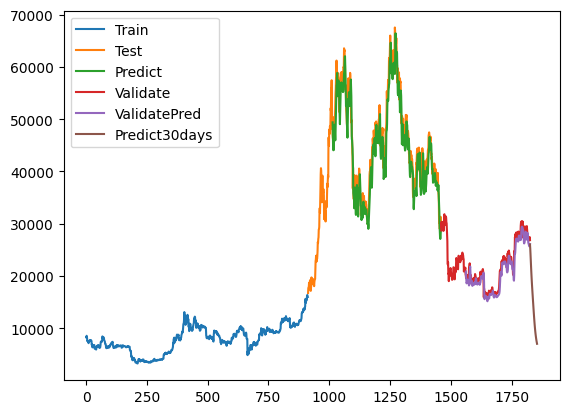

In [14]:
# 12.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

In [15]:
# Respliting train test
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]
# Repredictions on the testing set
x_test1 = np.array(test_data1.drop('Price', axis=1))  # Use the features (excluding the target variable)
y_test1 = np.array(test_data1['Price'])

# Repredictions on the validation set
x_val1 = np.array(val_data1.drop('Price', axis=1))  # Use the features (excluding the target variable)
y_val1 = np.array(val_data1['Price'])

In [16]:
# Calculate evalution
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 6049.447988958658
Testing RMSE: 14374.157202946091
Validation MAPE: 21.454840315342523
Testing MAPE: 31.387853154182245
Validation MAE: 4871.01612532542
Testing MAE: 11509.196580211727
